Develop classification model for cat-dogs dataset using CNN model. Analyze the model accuracy and generate classification report.
* Develop an application and test the user given inputs.
* Analyze the result with and without regularization/dropout 


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img, img_to_array

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip "/content/gdrive/MyDrive/MIT SOE/SEM 7/catsndogs.zip"

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)
train_path = '/content/training_set/training_set'
train_set = train_datagen.flow_from_directory(directory=train_path,target_size=(128,128),batch_size=32,color_mode="rgb",class_mode = 'binary')
test_path = '/content/test_set/test_set'
test_set = train_datagen.flow_from_directory(directory=train_path,target_size=(128,128),batch_size=30,color_mode="rgb",class_mode = 'binary')

Found 8005 images belonging to 2 classes.
Found 8005 images belonging to 2 classes.


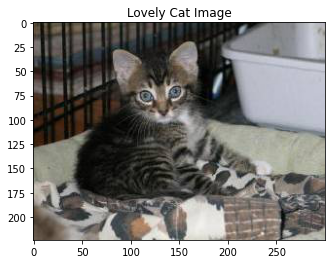

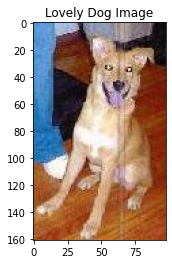

In [ ]:
img = load_img(train_path + "/cats/cat.12.jpg")
plt.imshow(img)
plt.title("Lovely Cat Image")
plt.show()

img = load_img(train_path + "/dogs/dog.12.jpg")
plt.imshow(img)
plt.title("Lovely Dog Image")
plt.show()

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (5,5), activation = "relu", input_shape = (128,128,3)))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 16, kernel_size = (5,5), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units = 256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units = 1, activation = "sigmoid"))

In [ ]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_set, validation_data = test_set, epochs = 5)

Epoch 1/5
251/251 [==============================] - 44s 177ms/step - loss: 0.6935 - accuracy: 0.5083 - val_loss: 0.6929 - val_accuracy: 0.5003
Epoch 2/5
251/251 [==============================] - 44s 174ms/step - loss: 0.6937 - accuracy: 0.5053 - val_loss: 0.6903 - val_accuracy: 0.5388
Epoch 3/5
251/251 [==============================] - 44s 174ms/step - loss: 0.6876 - accuracy: 0.5332 - val_loss: 0.6869 - val_accuracy: 0.5310
Epoch 4/5
251/251 [==============================] - 44s 174ms/step - loss: 0.6840 - accuracy: 0.5434 - val_loss: 0.6791 - val_accuracy: 0.5625
Epoch 5/5
251/251 [==============================] - 44s 176ms/step - loss: 0.6804 - accuracy: 0.5538 - val_loss: 0.6818 - val_accuracy: 0.5519


In [ ]:
rmsprop = model.evaluate(test_set)

267/267 [==============================] - 22s 83ms/step - loss: 0.6818 - accuracy: 0.5519


Text(0, 0.5, 'Accuracy')

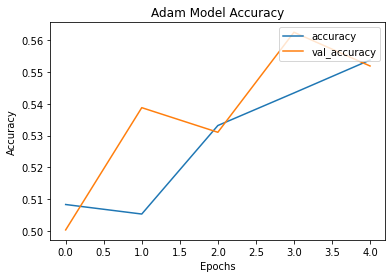

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title("Adam Model Accuracy")
plt.legend(loc='upper right')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")